In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import bioframe
import numpy as np


import matplotlib
import os


figure_width = 5
matplotlib.rcParams['font.size'] = 10
saveFigs = True 
if saveFigs == True:
    figure_path = '../figs/figure4/'
    os.makedirs(figure_path, exist_ok=True)
    # to save inkscape-friendly svgs
    new_rc_params = {'text.usetex': False,
                     "svg.fonttype": 'none'}
    matplotlib.rcParams.update(new_rc_params)

In [2]:
gm_df = pd.read_csv('../annotations/GM12878_hg38_50kb.tsv', sep = '\t')
im_df = pd.read_csv('../annotations/IMR90_hg38_50kb.tsv', sep = '\t')

In [3]:
one_track = gm_df[gm_df["E1"] == gm_df["E1"]]

In [4]:
one_track.binary.unique()

array([0., 1.])

In [5]:
mat = np.zeros((len(one_track.binary.unique()), len(one_track.HMM3P.unique())))

In [6]:
hmm_states = ['B', 'Mbb', 'M', 'Maa', 'A']

In [7]:
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        mat[i,j] = len(one_track[(one_track["binary"]==i) & (one_track["HMM3P"]==j)])

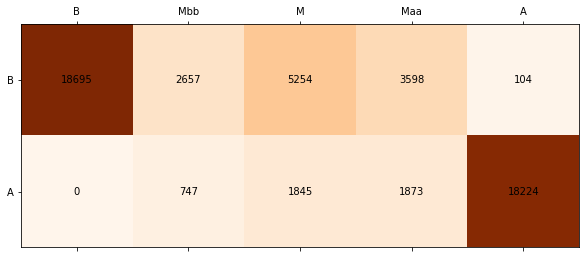

In [8]:
plt.matshow(mat, cmap="Oranges")
for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            text = plt.gca().text(j, i, int(mat[i, j]),
                           ha="center", va="center", color="black")
            
ticksx = np.arange(0,len(hmm_states),1)
plt.gca().set_xticks(ticksx)
plt.gca().set_xticklabels(hmm_states)

ticksy = np.arange(0,2,1)
plt.gca().set_yticks(ticksy)
plt.gca().set_yticklabels(['B', 'A']);

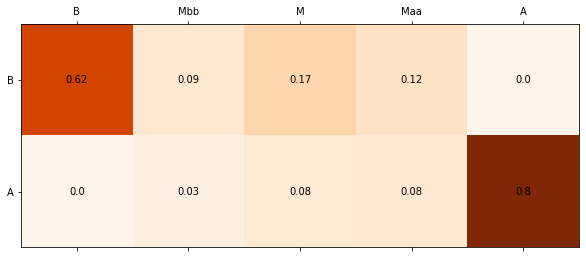

In [9]:
M = mat/ mat.sum(axis=1, keepdims=True)
plt.matshow(M, cmap="Oranges")
for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            text = plt.gca().text(j, i, np.round(M[i, j],2),
                           ha="center", va="center", color="black")
            
ticksx = np.arange(0,len(hmm_states),1)
plt.gca().set_xticks(ticksx)
plt.gca().set_xticklabels(hmm_states)

ticksy = np.arange(0,2,1)
plt.gca().set_yticks(ticksy)
plt.gca().set_yticklabels(['B', 'A']);

In [10]:
def between_cells(hmm_track1, hmm_track2, hmm):
    mask = (hmm_track1["E1"] == hmm_track1["E1"]) & (hmm_track2["E1"] == hmm_track2["E1"])
    track1= hmm_track1[mask]
    track2= hmm_track2[mask]
    
    size = len(track1[hmm].unique())
    mat = np.zeros((size, size))
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            mat[i,j] = ((track1[hmm]==i) & (track2[hmm]==j)).sum()
    
    return mat

In [11]:
def plot_mat(mat, states_names, cell_name1, cell_name2):
    plt.figure(1, figsize=(5,5))
    plt.matshow(mat, cmap="Oranges", fignum=1)

    plt.ylabel(cell_name1)
    plt.xlabel(cell_name2)
    ticks = np.arange(0, len(states_names), 1)
    plt.gca().set_yticks(ticks)
    plt.gca().set_xticks(ticks)
    plt.gca().set_yticklabels(states_names)
    plt.gca().set_xticklabels(states_names)
    plt.colorbar(shrink = .7)
    for i in range(mat.shape[0]):
            for j in range(mat.shape[1]):
                text = plt.gca().text(j, i, int(mat[i, j]),
                               ha="center", va="center", color="black")

In [12]:
def plot_mat2(mat, states_names, cell_name1, cell_name2):
    plt.figure(1, figsize=(5,5))
    plt.matshow(mat, cmap="bwr", fignum=1,  vmin=0, vmax=2)

    plt.ylabel(cell_name1)
    plt.xlabel(cell_name2)
    ticks = np.arange(0, len(states_names), 1)
    plt.gca().set_yticks(ticks)
    plt.gca().set_xticks(ticks)
    plt.gca().set_yticklabels(states_names)
    plt.gca().set_xticklabels(states_names)
    plt.colorbar(shrink = .7)
    for i in range(mat.shape[0]):
            for j in range(mat.shape[1]):
                text = plt.gca().text(j, i, np.round(mat[i, j],2),
                               ha="center", va="center", color="black")

In [13]:
mat = between_cells(gm_df, im_df, "HMM3P")

In [14]:
np.diag(mat).sum()/mat.sum()

0.534481114987893

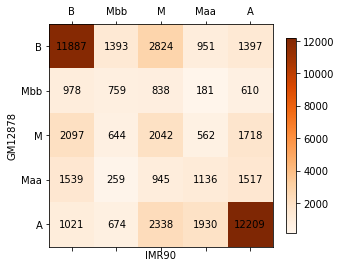

In [15]:
plot_mat(mat, ["B", "Mbb", "M", "Maa", "A"], "GM12878", "IMR90")
if saveFigs:
    plt.savefig(figure_path+'GM12878_IMR90'+'.svg', bbox_inches='tight')

In [16]:
p1 = mat.sum(axis=0, keepdims=True)
p1 = p1/p1.sum()
p2 = mat.sum(axis=1, keepdims=True)
p2 = p2/p2.sum()
mat2 = np.dot(p2, p1)
mat2*mat.sum()

array([[6164.38719518, 1311.89361094, 3161.70230128, 1674.60809548,
        6139.40879712],
       [1124.50288852,  239.31464852,  576.75536235,  305.48075273,
        1119.94634788],
       [2359.58523518,  502.16261511, 1210.22671548,  641.0013537 ,
        2350.02408054],
       [1802.67902153,  383.64285306,  924.59059277,  489.71305459,
        1795.37447806],
       [6070.84565959, 1291.98627238, 3113.72502812, 1649.1967435 ,
        6046.2462964 ]])

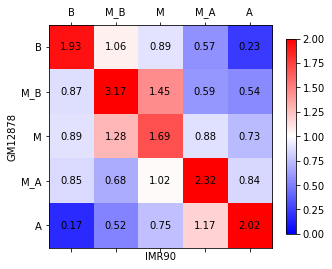

In [17]:
plot_mat2(mat/(mat2*mat.sum()), ["B", "M_B", "M", "M_A", "A"], "GM12878", "IMR90")
if saveFigs:
    plt.savefig(figure_path+'GM12878_IMR90_enriched'+'.svg', bbox_inches='tight')